In [17]:
import pandas as pd
data = pd.read_csv("降维后数据.csv")

In [16]:
y = data["报告分数的人数"]

In [17]:
y

0       80630
1      101503
2       91477
3      107134
4      153880
        ...  
354     20879
355     20160
356     20001
357     21204
358     20380
Name: 报告分数的人数, Length: 359, dtype: int64

In [18]:
x = range(359)

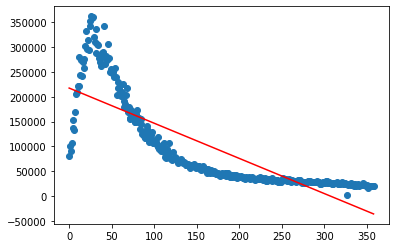

In [19]:
import numpy as np
import pylab

pylab.plot(x,y,'o') 
z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 
pylab.plot(x,p(x),"r") 

In [20]:
y = data["困难模式人数"]

In [21]:
y

0      1362
1      1763
2      1913
3      2242
4      3017
       ... 
354    2012
355    1937
356    1919
357    1973
358    1899
Name: 困难模式人数, Length: 359, dtype: int64

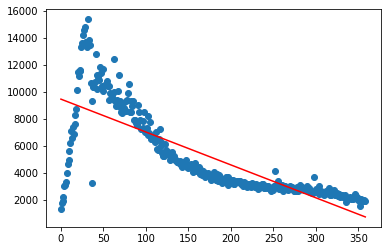

In [22]:
import numpy as np
import pylab

pylab.plot(x,y,'o') 
z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 
pylab.plot(x,p(x),"r") 

In [25]:
cishu = ["第一次尝试对了","第二次","三次","四次","五次","六次","七次及更多"]

In [28]:
data

,日期,比赛号码,当日单词,报告分数的人数,困难模式人数,第一次尝试对了,第二次,三次,四次,五次,六次,七次及更多
0,2022/1/7,202,slump,80630,1362,1,3,23,39,24,9,1
1,2022/1/8,203,crank,101503,1763,1,5,23,31,24,14,2
2,2022/1/9,204,gorge,91477,1913,1,3,13,27,30,22,4
3,2022/1/10,205,query,107134,2242,1,4,16,30,30,17,2
4,2022/1/11,206,drink,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022/12/27,556,condo,20879,2012,0,2,17,35,29,14,3
355,2022/12/28,557,impel,20160,1937,0,3,21,40,25,9,1
356,2022/12/29,558,havoc,20001,1919,0,2,16,38,30,12,2
357,2022/12/30,559,molar,21204,1973,0,4,21,38,26,9,1


In [32]:
data_new = data.drop(columns="日期")
data_new = data_new.drop(columns="比赛号码")
data_new = data_new.drop(columns="当日单词")

In [33]:
a = pd.DataFrame()
for i in data_new.columns:
    z = (data[i] - data[i].mean()) / data[i].std()
    a[i] = abs(z) > 2

In [35]:
pd.DataFrame(a).to_excel('异常值.xls')

<ipython-input-35-3193ad93d88c>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pd.DataFrame(a).to_excel('异常值.xls')
<ipython-input-35-3193ad93d88c>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(a).to_excel('异常值.xls')


In [41]:
data['报告分数的人数']=np.where(data['报告分数的人数'].isnull(),
                             data['报告分数的人数'].shift(1).rolling(3,min_periods=1).mean(),
                             data['报告分数的人数'])

In [42]:
pd.DataFrame(data).to_excel('填补后.xls')

<ipython-input-42-295ce161e80d>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pd.DataFrame(data).to_excel('填补后.xls')
<ipython-input-42-295ce161e80d>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(data).to_excel('填补后.xls')


In [47]:
y = data["前五次"]
y

0      90
1      84
2      74
3      81
4      95
       ..
350    83
351    89
352    86
353    89
354    85
Name: 前五次, Length: 355, dtype: int64

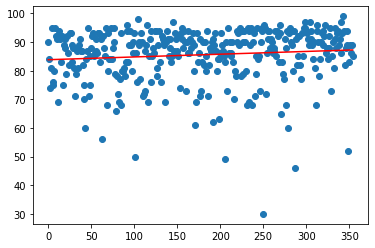

In [48]:
x = range(355)
pylab.plot(x,y,'o') 
z = np.polyfit(x, y, 1) 
p = np.poly1d(z) 
pylab.plot(x,p(x),"r") 

In [3]:
data = pd.read_csv("试一试.csv")

In [4]:
y = data["艰难模式的得分数（记录得分）"]

In [5]:
data = data.drop(columns = "艰难模式的得分数（记录得分）")

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(data,y)

LinearRegression()

In [7]:
regr.coef_

array([1458.36954077,  178.0638698 ,  366.92452853,  196.62332843,
        260.35105904,  421.72263727,  215.30738448])

In [9]:
import statsmodels.api as sm  # 引入线性回归模型评估相关库
X2 = sm.add_constant(data)
est = sm.OLS(y, X2).fit()
est.summary()

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         艰难模式的得分数（记录得分）   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     8.090
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           4.01e-09
Time:                        11:50:09   Log-Likelihood:                -3337.7
No. Observations:                 355   AIC:                             6691.
Df Residuals:                     347   BIC:                             6722.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.305e+04   2.05e+04     -1.123      0.262   -6.34e+04    1.73e+04
第一次尝试对了人数百分比  1458.3695    327.959      4.447      0.000     813.332    2103.407
第二次            178.0639    222.329      0.801      0.424    -259.218     615.346
三次             366.9245    212.497      1.727      0.085     -51.019     784.868
四次             196.6233    219.459      0.896      0.371    -235.014     628.260
五次             260.3511    219.811      1.184      0.237    -171.978     692.680
六次             421.7226    222.568      1.895      0.059     -16.029     859.474
七次及更多          215.3074    214.605      1.003      0.316    -206.783     637.398
==============================================================================
Omnibus:                       29.010   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.720
Skew:                           0.716   Prob(JB):                     4.76e-08
Kurtosis:                       3.478   Cond. No.                     6.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
import nltk

In [3]:
msg = data["当日单词"]

In [4]:
msg = list(msg)
msg

['slump',
 'crank',
 'gorge',
 'query',
 'drink',
 'favor',
 'abbey',
 'tangy',
 'panic',
 'solar',
 'shire',
 'proxy',
 'point',
 'robot',
 'prick',
 'wince',
 'crimp',
 'knoll',
 'sugar',
 'whack',
 'mount',
 'perky',
 'could',
 'wrung',
 'light',
 'those',
 'moist',
 'shard',
 'pleat',
 'aloft',
 'skill',
 'elder',
 'frame',
 'humor',
 'pause',
 'ulcer',
 'ultra',
 'robin',
 'cynic',
 'aroma',
 'caulk',
 'shake',
 'dodge',
 'swill',
 'tacit',
 'other',
 'thorn',
 'trove',
 'bloke',
 'vivid',
 'spill',
 'chant',
 'choke',
 'rupee',
 'nasty',
 'mourn',
 'ahead',
 'brine',
 'cloth',
 'hoard',
 'sweet',
 'month',
 'lapse',
 'watch',
 'today',
 'focus',
 'smelt',
 'tease',
 'cater',
 'movie',
 'saute',
 'allow',
 'renew',
 'their',
 'slosh',
 'purge',
 'chest',
 'depot',
 'epoxy',
 'found',
 'shall',
 'stove',
 'lowly',
 'snout',
 'trope',
 'fewer',
 'shawl',
 'natal',
 'comma',
 'foray',
 'scare',
 'stair',
 'black',
 'squad',
 'royal',
 'chunk',
 'mince',
 'shame',
 'cheek',
 'ample',


In [10]:
pd.DataFrame(nltk.tag.pos_tag(msg)).to_excel('leixingoutput.xls')

<ipython-input-10-42ce3a796f4a>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pd.DataFrame(nltk.tag.pos_tag(msg)).to_excel('leixingoutput.xls')
<ipython-input-10-42ce3a796f4a>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(nltk.tag.pos_tag(msg)).to_excel('leixingoutput.xls')


In [27]:
t = " "
a = "am"
t+a

' am'

In [30]:
a = ["a","b"]
t=""
for i in range(2):
    m = a[i]
    t = t + " " + m
t

' a b'

In [31]:
t = ""
for i in range(354):
    m = msg[i]
    t = t + " " + m
t

' slump crank gorge query drink favor abbey tangy panic solar shire proxy point robot prick wince crimp knoll sugar whack mount perky could wrung light those moist shard pleat aloft skill elder frame humor pause ulcer ultra robin cynic aroma caulk shake dodge swill tacit other thorn trove bloke vivid spill chant choke rupee nasty mourn ahead brine cloth hoard sweet month lapse watch today focus smelt tease cater movie saute allow renew their slosh purge chest depot epoxy found shall stove lowly snout trope fewer shawl natal comma foray scare stair black squad royal chunk mince shame cheek ample flair foyer cargo oxide plant olive inert askew heist shown zesty larva forgo story hairy train homer badge midst canny shine gecko farce slung tipsy metal yield delve being scour glass gamer scrap money hinge album vouch asset tiara crept bayou atoll manor creak showy peach froth depth gloom flood trait girth piety goose float donor atone primo apron blown cacao loser input gloat awful brink sm

In [47]:
import nltk

[nltk_data] Error loading punkt: <urlopen error [Errno 61] Connection
[nltk_data]     refused>


False

In [58]:
t

' slump crank gorge query drink favor abbey tangy panic solar shire proxy point robot prick wince crimp knoll sugar whack mount perky could wrung light those moist shard pleat aloft skill elder frame humor pause ulcer ultra robin cynic aroma caulk shake dodge swill tacit other thorn trove bloke vivid spill chant choke rupee nasty mourn ahead brine cloth hoard sweet month lapse watch today focus smelt tease cater movie saute allow renew their slosh purge chest depot epoxy found shall stove lowly snout trope fewer shawl natal comma foray scare stair black squad royal chunk mince shame cheek ample flair foyer cargo oxide plant olive inert askew heist shown zesty larva forgo story hairy train homer badge midst canny shine gecko farce slung tipsy metal yield delve being scour glass gamer scrap money hinge album vouch asset tiara crept bayou atoll manor creak showy peach froth depth gloom flood trait girth piety goose float donor atone primo apron blown cacao loser input gloat awful brink sm

In [64]:
g = ""
for i in range(354):
    mmm = msg[i]
    g = g+mmm+". "
g

'slump. crank. gorge. query. drink. favor. abbey. tangy. panic. solar. shire. proxy. point. robot. prick. wince. crimp. knoll. sugar. whack. mount. perky. could. wrung. light. those. moist. shard. pleat. aloft. skill. elder. frame. humor. pause. ulcer. ultra. robin. cynic. aroma. caulk. shake. dodge. swill. tacit. other. thorn. trove. bloke. vivid. spill. chant. choke. rupee. nasty. mourn. ahead. brine. cloth. hoard. sweet. month. lapse. watch. today. focus. smelt. tease. cater. movie. saute. allow. renew. their. slosh. purge. chest. depot. epoxy. found. shall. stove. lowly. snout. trope. fewer. shawl. natal. comma. foray. scare. stair. black. squad. royal. chunk. mince. shame. cheek. ample. flair. foyer. cargo. oxide. plant. olive. inert. askew. heist. shown. zesty. larva. forgo. story. hairy. train. homer. badge. midst. canny. shine. gecko. farce. slung. tipsy. metal. yield. delve. being. scour. glass. gamer. scrap. money. hinge. album. vouch. asset. tiara. crept. bayou. atoll. manor

In [65]:
from textblob import TextBlob

blob = TextBlob(g)
for i in range(len(blob.sentences)):
    print("{}:情感倾向得分 {}".format(blob.sentences[i].string, blob.sentences[i].polarity))

slump.:情感倾向得分 0.0
crank.:情感倾向得分 0.0
gorge.:情感倾向得分 0.0
query.:情感倾向得分 0.0
drink.:情感倾向得分 0.0
favor.:情感倾向得分 0.0
abbey.:情感倾向得分 0.0
tangy.:情感倾向得分 0.0
panic.:情感倾向得分 0.0
solar.:情感倾向得分 0.0
shire.:情感倾向得分 0.0
proxy.:情感倾向得分 0.0
point.:情感倾向得分 0.0
robot.:情感倾向得分 0.0
prick.:情感倾向得分 0.0
wince.:情感倾向得分 0.0
crimp.:情感倾向得分 0.0
knoll.:情感倾向得分 0.0
sugar.:情感倾向得分 0.0
whack.:情感倾向得分 0.0
mount.:情感倾向得分 0.0
perky.:情感倾向得分 0.0
could.:情感倾向得分 0.0
wrung.:情感倾向得分 0.0
light.:情感倾向得分 0.4
those.:情感倾向得分 0.0
moist.:情感倾向得分 0.0
shard.:情感倾向得分 0.0
pleat.:情感倾向得分 0.0
aloft.:情感倾向得分 0.0
skill.:情感倾向得分 0.0
elder.:情感倾向得分 0.0
frame.:情感倾向得分 0.0
humor.:情感倾向得分 0.0
pause.:情感倾向得分 0.0
ulcer.:情感倾向得分 0.0
ultra.:情感倾向得分 0.0
robin.:情感倾向得分 0.0
cynic.:情感倾向得分 0.0
aroma.:情感倾向得分 0.0
caulk.:情感倾向得分 0.0
shake.:情感倾向得分 0.0
dodge.:情感倾向得分 0.0
swill.:情感倾向得分 -0.1
tacit.:情感倾向得分 0.0
other.:情感倾向得分 -0.125
thorn.:情感倾向得分 0.0
trove.:情感倾向得分 0.0
bloke.:情感倾向得分 0.0
vivid.:情感倾向得分 0.125
spill.:情感倾向得分 0.0
chant.:情感倾向得分 0.0
choke.:情感倾向得分 0.0
rupee.:情感倾向得分 0.0
nasty.:情感倾向得分 -1.0
mou

In [ ]:
pd.DataFrame(nltk.tag.pos_tag(msg)).to_excel('leixingoutput.xls')

In [76]:
cc = ",".join(msg)
cc

'slump,crank,gorge,query,drink,favor,abbey,tangy,panic,solar,shire,proxy,point,robot,prick,wince,crimp,knoll,sugar,whack,mount,perky,could,wrung,light,those,moist,shard,pleat,aloft,skill,elder,frame,humor,pause,ulcer,ultra,robin,cynic,aroma,caulk,shake,dodge,swill,tacit,other,thorn,trove,bloke,vivid,spill,chant,choke,rupee,nasty,mourn,ahead,brine,cloth,hoard,sweet,month,lapse,watch,today,focus,smelt,tease,cater,movie,saute,allow,renew,their,slosh,purge,chest,depot,epoxy,found,shall,stove,lowly,snout,trope,fewer,shawl,natal,comma,foray,scare,stair,black,squad,royal,chunk,mince,shame,cheek,ample,flair,foyer,cargo,oxide,plant,olive,inert,askew,heist,shown,zesty,larva,forgo,story,hairy,train,homer,badge,midst,canny,shine,gecko,farce,slung,tipsy,metal,yield,delve,being,scour,glass,gamer,scrap,money,hinge,album,vouch,asset,tiara,crept,bayou,atoll,manor,creak,showy,peach,froth,depth,gloom,flood,trait,girth,piety,goose,float,donor,atone,primo,apron,blown,cacao,loser,input,gloat,awful,brink,smi

In [77]:
# 中文
d = {}
for i in cc:
    d[i] = d.get(i, 0) + 1  # 字典中的值
ls = list(d.items())
ls.sort(key=lambda x: x[1], reverse=True)  # 排序
for i in range(len(d)):
    word, count = ls[i]
    print("{:}{:}".format(word, count))

,354
e182
a157
r132
o132
t129
l111
i102
s86
n86
c70
h68
u64
p62
y60
m54
d54
g51
k35
f33
b30
w30
v25
x8
q5
z5
j4


In [83]:
msg[1][1]

'r'

In [84]:
d[msg[1][1]]

132

In [123]:
df = pd.DataFrame(columns = ["A","B","C","D","E"])
df

,A,B,C,D,E


In [119]:
msg

['slump',
 'crank',
 'gorge',
 'query',
 'drink',
 'favor',
 'abbey',
 'tangy',
 'panic',
 'solar',
 'shire',
 'proxy',
 'point',
 'robot',
 'prick',
 'wince',
 'crimp',
 'knoll',
 'sugar',
 'whack',
 'mount',
 'perky',
 'could',
 'wrung',
 'light',
 'those',
 'moist',
 'shard',
 'pleat',
 'aloft',
 'skill',
 'elder',
 'frame',
 'humor',
 'pause',
 'ulcer',
 'ultra',
 'robin',
 'cynic',
 'aroma',
 'caulk',
 'shake',
 'dodge',
 'swill',
 'tacit',
 'other',
 'thorn',
 'trove',
 'bloke',
 'vivid',
 'spill',
 'chant',
 'choke',
 'rupee',
 'nasty',
 'mourn',
 'ahead',
 'brine',
 'cloth',
 'hoard',
 'sweet',
 'month',
 'lapse',
 'watch',
 'today',
 'focus',
 'smelt',
 'tease',
 'cater',
 'movie',
 'saute',
 'allow',
 'renew',
 'their',
 'slosh',
 'purge',
 'chest',
 'depot',
 'epoxy',
 'found',
 'shall',
 'stove',
 'lowly',
 'snout',
 'trope',
 'fewer',
 'shawl',
 'natal',
 'comma',
 'foray',
 'scare',
 'stair',
 'black',
 'squad',
 'royal',
 'chunk',
 'mince',
 'shame',
 'cheek',
 'ample',


In [126]:
for i in range(354):
    liebiao = []
    for j in range(5):
        row = i
        ff = d[msg[i][j]]
        liebiao.append(ff)
        
    value = pd.DataFrame([liebiao],columns=df.columns)
    df_tmp2 = df[row:]
    df = df.append(value).append(df_tmp2)
   # df = df.append(liebiao, ignore_index=True)

<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(value).append(df_tmp2)
<ipython-input-126-8243f46a12b9>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

In [127]:
df

,A,B,C,D,E
0,86,111,64,54,62
0,70,132,157,86,35
0,51,132,132,51,182
0,5,64,182,132,60
0,54,132,102,86,35
...,...,...,...,...,...
0,4,64,54,51,182
0,70,132,86,54,132
0,102,54,62,182,111
0,68,157,25,132,70


In [128]:
pd.DataFrame(df).to_excel('pinlv.xls')

<ipython-input-128-607614a4592f>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  pd.DataFrame(df).to_excel('pinlv.xls')
<ipython-input-128-607614a4592f>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(df).to_excel('pinlv.xls')


In [133]:
pip install fuzzywuzzy

Looking in indexes: https://mirrors.bfsu.edu.cn/pypi/web/simple
Note: you may need to restart the kernel to use updated packages.


In [134]:
from fuzzywuzzy import fuzz,process

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [138]:
msg[1], msg[4]

('crank', 'drink')

In [140]:
fuzz.ratio('crank', 'drink')

60

In [142]:
data

,日期,比赛号码,当日单词,报告结果数,艰难模式的得分数,第一次尝试对了人数百分比,第二次,三次,四次,五次,六次,七次及更多
0,2022/1/7,202,slump,80630,1362,1,3,23,39,24,9,1
1,2022/1/8,203,crank,101503,1763,1,5,23,31,24,14,2
2,2022/1/9,204,gorge,91477,1913,1,3,13,27,30,22,4
3,2022/1/10,205,query,107134,2242,1,4,16,30,30,17,2
4,2022/1/11,206,drink,153880,3017,1,9,35,34,16,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
350,2022/12/27,556,condo,20879,2012,0,2,17,35,29,14,3
351,2022/12/28,557,impel,20160,1937,0,3,21,40,25,9,1
352,2022/12/29,558,havoc,20001,1919,0,2,16,38,30,12,2
353,2022/12/30,559,molar,21204,1973,0,4,21,38,26,9,1


In [2]:
from statsmodels.tsa.api import ExponentialSmoothing, \
SimpleExpSmoothing, Holt
import statsmodels.api as sm

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
x = data["日期"]
y = data["报告结果数"]

In [144]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
seed=5
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=seed)

In [157]:
import pandas as pd          
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime    
from pandas import Series 
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [4]:
xtrain = x[:200]
ytrain = y[:200]

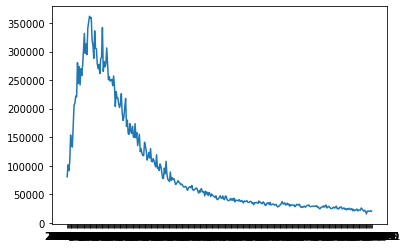

In [172]:
plt.plot(xtest, y_hat, label = 'Train')


In [6]:
import numpy as np
dd = np.asarray(ytrain)
dd

array([ 80630, 101503,  91477, 107134, 153880, 137586, 132726, 169484,
       205880, 209609, 222197, 220950, 280622, 243964, 273727, 241489,
       269929, 258038, 276404, 302348, 331844, 296968, 313220, 294687,
       341314, 351663, 361908, 358176, 359679, 319698, 311018, 288228,
       336236, 305372, 304830, 278826, 269885, 277471, 261521, 287836,
       289721, 342003, 265238, 282327, 273306, 278731, 306356, 277576,
       250674, 255907, 248363, 250413, 251094, 240137, 257304, 240018,
       203730, 229895, 218595, 218595, 207473, 201799, 208884, 226349,
       192049, 179436, 185406, 202855, 217856, 169071, 179830, 156311,
       154987, 173636, 160161, 156785, 169066, 150197, 149507, 173696,
       149070, 158139, 135219, 144648, 155079, 124532, 129651, 121356,
       117856, 117761, 141158, 134210, 126241, 109828, 114907, 123255,
       113448, 129991, 107987, 106681, 112383, 108899, 102007,  97955,
       119232,  95562,  97452,  91548, 103153,  98967,  88974,  77991,
      

In [7]:
dd = np.asarray(ytrain)

In [19]:
#关于lstm对时间序列数据的预测
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,Input,optimizers

In [10]:
#创建时间序列函数
def data_set(dataset,lookback):#创建时间序列数据样本
    dataX,dataY=[],[]#初始化训练集和测试集的列表
    for i in range(len(dataset)-lookback-1):
        a=dataset[i:(i+lookback)]
        dataX.append(a)
        dataY.append(dataset[i+lookback])
    return np.array(dataX),np.array(dataY)#转化为数组输出

In [11]:
x = data["日期"]
y = data["报告结果数"]

In [12]:
import numpy as np

In [13]:
y = [list(y)]

In [31]:
#划分训练集和测试集
train_size=int(len(x)*0.7)#百分之70训练集
test_size=len(x)-train_size#剩下的30的训练集
train,test=y[0][0:train_size],y[0][train_size:len(x)]#根据数量划分数据集
print(len(train))
print(len(test))

248
107


In [32]:
#根据划分的训练集测试集生成需要的时间序列样本数据
lookback=1
trainX,trainY=data_set(train,lookback)
testX,testY=data_set(test,lookback)

In [33]:
trainX.shape

(246, 1)

In [34]:
#构建lstm模型，这里其实有个bug,可能是由于numpy的问题，这里的trainX是三维的（509，1，1）,input不需要将样本数量输入，只需输入样本的维度(1,1)
input_shape=Input(shape=(trainX.shape[0],trainX.shape[1]))
lstm1=layers.LSTM(32,return_sequences=1)(input_shape)
print("lstm1:",lstm1.shape)
lstm2=layers.LSTM(64,return_sequences=0)(lstm1)
print("lstm2:",lstm2.shape)
dense1=layers.Dense(64,activation="relu")(lstm2)
print("dense:",dense1.shape)
dropout=layers.Dropout(rate=0.2)(dense1)
print("dropout:",dropout.shape)
ouput_shape=layers.Dense(1,activation="relu")(dropout)
lstm_model=tf.keras.Model(input_shape,ouput_shape)
lstm_model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["mse"])#mse作为l损失函数，采用Adam作为寻优方式
history=lstm_model.fit(trainX,trainY,batch_size=32,epochs=30,validation_split=0.1,verbose=1)
lstm_model.summary()

lstm1: (None, 246, 32)
lstm2: (None, 64)
dense: (None, 64)
dropout: (None, 64)
Epoch 1/30
7/7 [==============================] - 4s 108ms/step - loss: 25643415552.0000 - mse: 25643415552.0000 - val_loss: 1094767872.0000 - val_mse: 1094767872.0000
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 25643411456.0000 - mse: 25643411456.0000 - val_loss: 1094764672.0000 - val_mse: 1094764672.0000
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 25643384832.0000 - mse: 25643384832.0000 - val_loss: 1094754304.0000 - val_mse: 1094754304.0000
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 25643339776.0000 - mse: 25643339776.0000 - val_loss: 1094739328.0000 - val_mse: 1094739328.0000
Epoch 5/30
7/7 [==============================] - 0s 7ms/step - loss: 25643270144.0000 - mse: 25643270144.0000 - val_loss: 1094718976.0000 - val_mse: 1094718976.0000
Epoch 6/30
7/7 [==============================] - 0s 6ms/step - loss: 25643175936.0000 - 

In [35]:
st=StandardScaler()

4/4 [==============================] - 0s 2ms/step


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/matplotlib

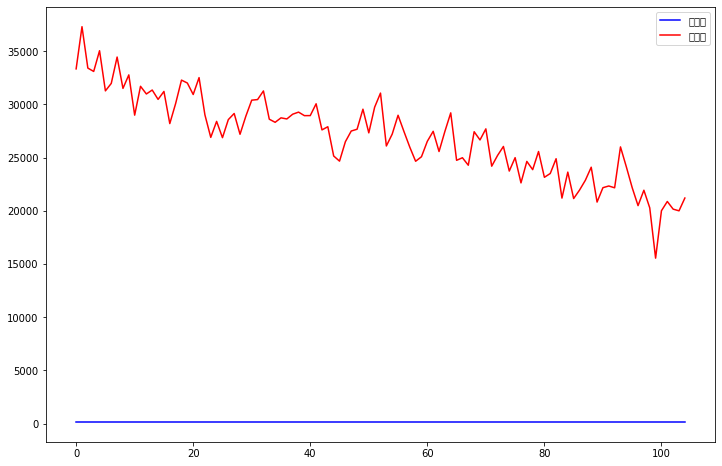

In [36]:
#预测测试集
predict_trainY=lstm_model.predict(trainX)
predict_testY=lstm_model.predict(testX)

#看一看数据形状
#print("Y:",testY_predict,testY_predict.shape)
#print("Y_real:",testY_real,testY_real.shape)
plt.figure(figsize=(12,8))
plt.plot(predict_testY,"b",label="预测值")
plt.plot(testY,"r",label="真实值")
plt.legend()
plt.show()

In [37]:
#关于lstm对时间序列数据的预测
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers,Input,optimizers
#导入数据
data=pd.read_csv("降维后数据.csv")#读取csv文件
df=pd.DataFrame(data)#只取日期和收盘价两列
print(df.head)

<bound method NDFrame.head of       Q1-t-SNE  Q2-日期  Q3-工作日为0，休假日为1  Q4-当日单词  Q8-柯林斯词典  Q9-单词中重复字母的出现最多个数  \
0    -4.176443      1               0        1         2                  1   
1    23.819445      2               1        2         2                  1   
2    16.335033      3               1        3         2                  2   
3   -20.189838      4               0        4         2                  1   
4    -3.121626      5               0        5         4                  1   
..         ...    ...             ...      ...       ...                ...   
349  15.018916    350               0      350         1                  2   
350  15.018916    351               0      351         2                  1   
351  15.443541    352               0      352         3                  1   
352  16.335033    353               0      353         2                  1   
353  10.531687    354               1      354         2                  1   

     Q10-字母种类  Q12-词性

In [42]:
df = np.array(df)

In [43]:
st=StandardScaler()
dataset_st=st.fit_transform(df.reshape(-1,1))
print("标准化",dataset_st)

标准化 [[-0.77914219]
 [-0.70606862]
 [-0.72018518]
 ...
 [-0.38138767]
 [-0.02847361]
 [-0.72018518]]


In [30]:
def data_set(dataset,lookback):#创建时间序列数据样本
    dataX,dataY=[],[]#初始化训练集和测试集的列表
    for i in range(len(dataset)-lookback-1):
        a=dataset[i:(i+lookback)]
        dataX.append(a)
        dataY.append(dataset[i+lookback])
    return np.array(dataX),np.array(dataY)#转化为数组输出


In [44]:
#划分训练集和测试集
train_size=int(len(df)*0.7)#百分之70训练集
test_size=len(df)-train_size#剩下的30的训练集
train,test=dataset_st[0:train_size],df[train_size:len(dataset_st)]#根据数量划分数据集
print(len(train))
print(len(test))

247
107


In [45]:
train

array([[-7.79142194e-01],
       [-7.06068617e-01],
       [-7.20185180e-01],
       [-7.06068617e-01],
       [-6.91952055e-01],
       [-7.06068617e-01],
       [-6.49602367e-01],
       [-7.06068617e-01],
       [-7.20185180e-01],
       [ 4.93839213e-01],
       [ 8.46753281e-01],
       [ 1.83274834e-01],
       [ 4.21092065e-02],
       [ 1.55041708e-01],
       [-2.40481647e-04],
       [-1.41406109e-01],
       [-3.24921424e-01],
       [-5.08436739e-01],
       [-6.07252678e-01],
       [-7.06068617e-01],
       [-3.83936496e-01],
       [-6.91952055e-01],
       [-7.06068617e-01],
       [-6.91952055e-01],
       [-6.91952055e-01],
       [-7.06068617e-01],
       [-6.49602367e-01],
       [-7.06068617e-01],
       [-7.20185180e-01],
       [ 2.67974210e-01],
       [ 1.14320110e+00],
       [ 1.49611517e+00],
       [ 4.93839213e-01],
       [-2.26105485e-01],
       [-2.68455173e-01],
       [-2.26105485e-01],
       [-1.27289546e-01],
       [-3.53154550e-01],
       [-4.9

In [46]:
#根据划分的训练集测试集生成需要的时间序列样本数据
lookback=1
trainX,trainY=data_set(train,lookback)
testX,testY=data_set(test,lookback)
print('trianX:',trainX.shape,trainY.shape)
print(trainX)

trianX: (245, 1, 1) (245, 1)
[[[-7.79142194e-01]]

 [[-7.06068617e-01]]

 [[-7.20185180e-01]]

 [[-7.06068617e-01]]

 [[-6.91952055e-01]]

 [[-7.06068617e-01]]

 [[-6.49602367e-01]]

 [[-7.06068617e-01]]

 [[-7.20185180e-01]]

 [[ 4.93839213e-01]]

 [[ 8.46753281e-01]]

 [[ 1.83274834e-01]]

 [[ 4.21092065e-02]]

 [[ 1.55041708e-01]]

 [[-2.40481647e-04]]

 [[-1.41406109e-01]]

 [[-3.24921424e-01]]

 [[-5.08436739e-01]]

 [[-6.07252678e-01]]

 [[-7.06068617e-01]]

 [[-3.83936496e-01]]

 [[-6.91952055e-01]]

 [[-7.06068617e-01]]

 [[-6.91952055e-01]]

 [[-6.91952055e-01]]

 [[-7.06068617e-01]]

 [[-6.49602367e-01]]

 [[-7.06068617e-01]]

 [[-7.20185180e-01]]

 [[ 2.67974210e-01]]

 [[ 1.14320110e+00]]

 [[ 1.49611517e+00]]

 [[ 4.93839213e-01]]

 [[-2.26105485e-01]]

 [[-2.68455173e-01]]

 [[-2.26105485e-01]]

 [[-1.27289546e-01]]

 [[-3.53154550e-01]]

 [[-4.94320177e-01]]

 [[-7.06068617e-01]]

 [[-4.89590656e-01]]

 [[-6.77835492e-01]]

 [[-7.06068617e-01]]

 [[-6.77835492e-01]]

 [[

In [47]:
#构建lstm模型，这里其实有个bug,可能是由于numpy的问题，这里的trainX是三维的（509，1，1）,input不需要将样本数量输入，只需输入样本的维度(1,1)
input_shape=Input(shape=(trainX.shape[1],trainX.shape[2]))
lstm1=layers.LSTM(32,return_sequences=1)(input_shape)
print("lstm1:",lstm1.shape)
lstm2=layers.LSTM(64,return_sequences=0)(lstm1)
print("lstm2:",lstm2.shape)
dense1=layers.Dense(64,activation="relu")(lstm2)
print("dense:",dense1.shape)
dropout=layers.Dropout(rate=0.2)(dense1)
print("dropout:",dropout.shape)
ouput_shape=layers.Dense(1,activation="relu")(dropout)
lstm_model=tf.keras.Model(input_shape,ouput_shape)
lstm_model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["mse"])#mse作为l损失函数，采用Adam作为寻优方式
history=lstm_model.fit(trainX,trainY,batch_size=32,epochs=10,validation_split=0.1,verbose=1)
lstm_model.summary()

lstm1: (None, 1, 32)
lstm2: (None, 64)
dense: (None, 64)
dropout: (None, 64)
Epoch 1/10
7/7 [==============================] - 4s 109ms/step - loss: 0.4804 - mse: 0.4804 - val_loss: 0.4070 - val_mse: 0.4070
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4772 - mse: 0.4772 - val_loss: 0.4061 - val_mse: 0.4061
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4746 - mse: 0.4746 - val_loss: 0.4056 - val_mse: 0.4056
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4690 - mse: 0.4690 - val_loss: 0.4053 - val_mse: 0.4053
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4669 - mse: 0.4669 - val_loss: 0.4045 - val_mse: 0.4045
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.4619 - mse: 0.4619 - val_loss: 0.4037 - val_mse: 0.4037
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.4568 - mse: 0.4568 - val_loss: 0.4036 - val_mse: 0.4036
Epoch 8/10
7/7 [=========

In [48]:
#预测测试集
predict_trainY=lstm_model.predict(trainX)
predict_testY=lstm_model.predict(testX)
#反标准化
#trainY=st.inverse_transform(predict_trainY)
testY_real=st.inverse_transform(testY)
testY_predict=st.inverse_transform(predict_testY)
#看一看数据形状
print("Y:",testY_predict,testY_predict.shape)
print("Y_real:",testY_real,testY_real.shape)
plt.figure(figsize=(12,8))
plt.plot(testY_predict,"b",label="预测值")
plt.plot(testY_real,"r",label="真实值")
plt.legend()
plt.show()

8/8 [==============================] - 1s 2ms/step


InvalidArgumentError: Graph execution error:

Specified a list with shape [?,1] from a tensor with shape [32,20]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[model_2/lstm_4/PartitionedCall]] [Op:__inference_predict_function_25204]